In [ ]:
import numpy as np
import cv2
import os

importanto as bibliotecas necessárias para o funcionamento do código.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Arquivo carregador("name") com tamanho de (length) bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ursos.PNG to ursos (1).PNG
Arquivo carregador("name") com tamanho de (length) bytes


aqui importa a imagem diretamente do google colab.

In [ ]:
filename = next(iter(uploaded))
print(filename)

ursos (1).PNG


aqui guarda a imagem e mostra o nome dela.

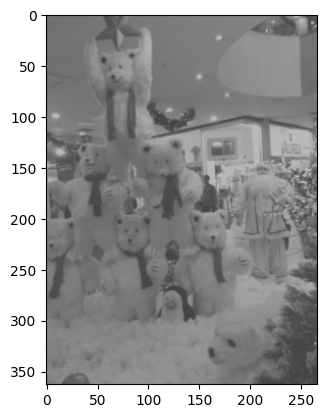

In [ ]:
from matplotlib import pyplot as plt
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

aqui apresenta a imagem original

In [ ]:
x = img.shape [0]
y = img.shape [1]
z = img.shape [2]

histograma_vetor = [0] * 256

for a in range(0,x-1):
  for b in range(0,y-1):
    for c in range(0,z):
      pixels = img[a,b,c]
      histograma_vetor[pixels] += 1

aqui ele calcula o histograma da imagem que será apresentada

In [ ]:
min_val = 255
max_val = 0
for a in range(0,x-1):
    for b in range(0,y-1):
      for c in range(0,z):
        pixels = img[a,b,c]
        if pixels < min_val:
            min_val = pixels
        if pixels > max_val:
            max_val = pixels

img_normalizada = [[(((img[a,b,c] - min_val) / (max_val - min_val)) * 255) for b in range(y)] for a in range(x)]

aqui ele normaliza os valores de intensidade dos pixels de 0 a 255

In [ ]:
histograma_acumulado = [0] * 256
histograma_acumulado[0] = histograma_vetor[0]
for i in range(1, 256):
    histograma_acumulado[i] = histograma_acumulado[i - 1] + histograma_vetor[i]

total_pixels = x * y
L = 255

aqui ele calcula o histograma acumulado e prepara valores para realizar transformações de intensidade, como a equalização de histogramas.

In [ ]:
img_equalizada = np.zeros_like(img, dtype=np.uint8)
for a in range(0,x-1):
    for b in range(0,y-1):
      for c in range(z):
        pixels = img[a,b,c]
        img_equalizada[a][b][c] = ((histograma_acumulado[pixels] / total_pixels) * L)

aqui ele aplica a equalização do histograma na imagem ajustando os valores de intensidade dos pixels com base no histograma que foi calculado antes.

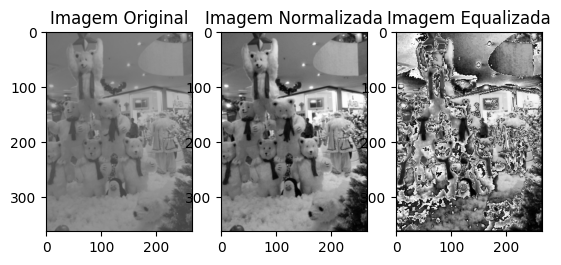

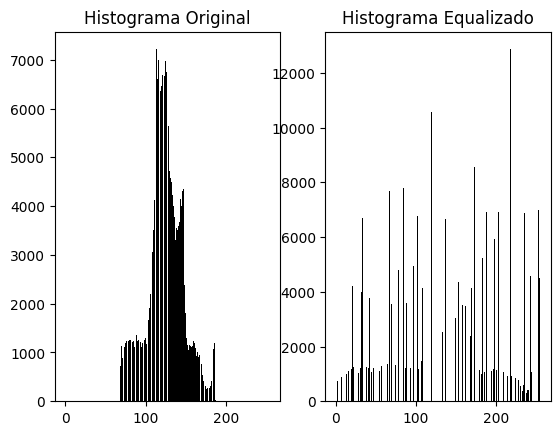

In [ ]:
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Imagem Normalizada")
plt.imshow(img_normalizada, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Imagem Equalizada")
plt.imshow(img_equalizada, cmap='gray')

plt.show()

plt.subplot(1, 2, 1)
plt.title("Histograma Original")
plt.bar(range(256), histograma_vetor, color='black')

histograma_vetor_equalizado = [0] * 256
for a in range(0,x-1):
    for b in range(0,y-1):
      for c in range(z):
        pixels = img_equalizada[a][b][c]
        histograma_vetor_equalizado[pixels] += 1

plt.subplot(1, 2, 2)
plt.title("Histograma Equalizado")
plt.bar(range(256), histograma_vetor_equalizado, color='black')

plt.show()

aqui ele apresenta as imagens e por fim o histograma, normal e equalizado